I found the article "Movie Genre Classification from RGB Movie Poster Image Using Deep Feed-forward Network" which teachs us how to identify a movie genre from a poster. So I tried using this method to find how I can identify Episode of Star Wars by images. 

In this article, the authors utilized a pre-trained InceptionV3 model with ImageNet weights to extract greater levels of features from the poster. And they got high performance in this experiment.

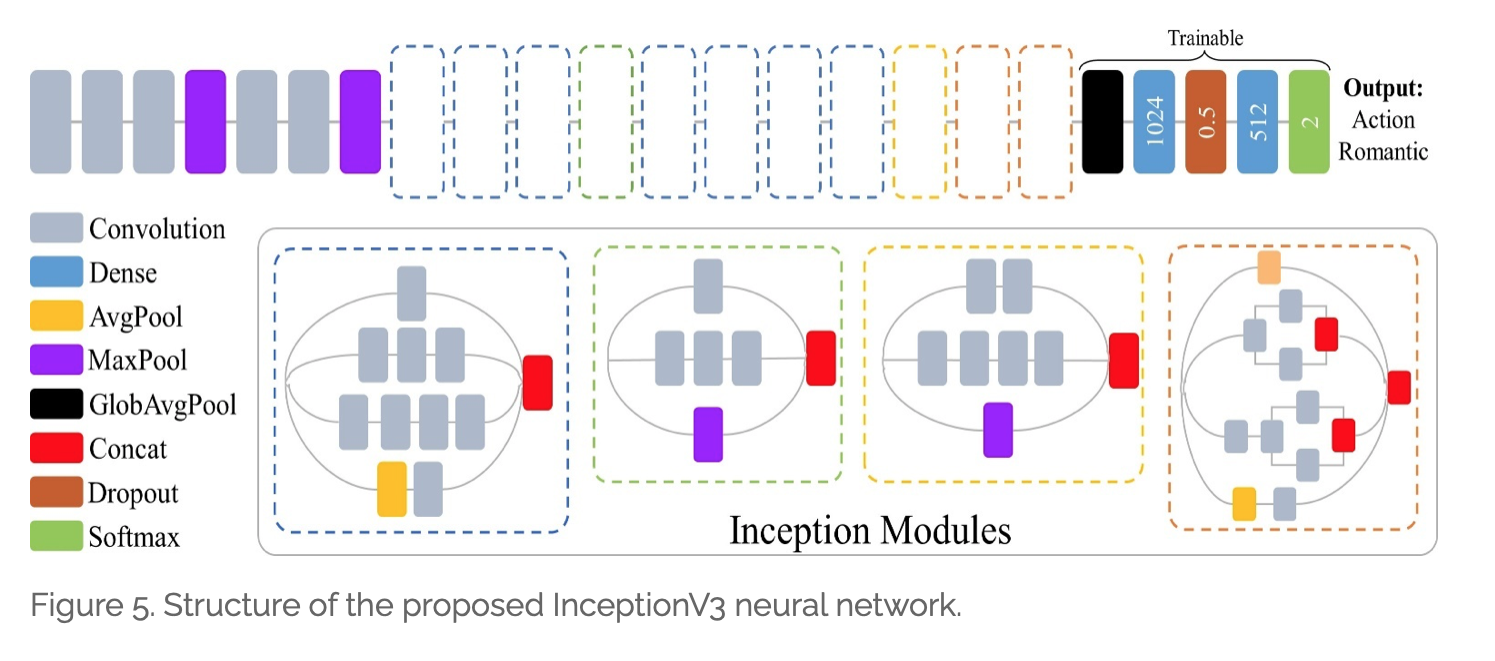

There may be difference between "poster image to genre" and "image to Star Wars Episode", but I tried InceptionV3 for modeling to classify Star Wars Episode.

Reference:
https://yjes.scholasticahq.com/article/29615-movie-genre-classification-from-rgb-movie-poster-image-using-deep-feed-forward-network

# Importing

In [ ]:
import os
import random
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
import tensorflow as tf
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, Reshape, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from PIL import Image
from PIL import UnidentifiedImageError

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
import itertools

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Episode1 = os.listdir('/kaggle/input/images-from-star-wars-movies/Episode I - The Phantom Menace/')
Episode2 = os.listdir('/kaggle/input/images-from-star-wars-movies/Episode II - Attack of the Clones/')
Episode3 = os.listdir('/kaggle/input/images-from-star-wars-movies/Episode III - Revenge of the Sith/')
Episode4 = os.listdir('/kaggle/input/images-from-star-wars-movies/Episode IV - A New Hope/')
Episode5 = os.listdir('/kaggle/input/images-from-star-wars-movies/Episode V - The Empire Strikes Back/')
Episode6 = os.listdir('/kaggle/input/images-from-star-wars-movies/Episode VI - Return of the Jedi/')
Episode7 = os.listdir('/kaggle/input/images-from-star-wars-movies/Episode VII - The Force Awakens/')
Episode8 = os.listdir('/kaggle/input/images-from-star-wars-movies/Episode VIII - The Last Jedi/')
Episode9 = os.listdir('/kaggle/input/images-from-star-wars-movies/Episode IX - The Rise of Skywalker/')

# Data Preprocessing

In [ ]:
img_w, img_h = 150, 150
X = []
y = []

In [ ]:
for i in Episode1:
    try:
        img = Image.open("/kaggle/input/images-from-star-wars-movies/Episode I - The Phantom Menace/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(0)
    except UnidentifiedImageError:
        pass

In [ ]:
for i in Episode2:
    try:
        img = Image.open("/kaggle/input/images-from-star-wars-movies/Episode II - Attack of the Clones/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(1)
    except UnidentifiedImageError:
        pass

In [ ]:
for i in Episode3:
    try:
        img = Image.open("/kaggle/input/images-from-star-wars-movies/Episode III - Revenge of the Sith/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(2)
    except UnidentifiedImageError:
        pass

In [ ]:
for i in Episode4:
    try:
        img = Image.open("/kaggle/input/images-from-star-wars-movies/Episode IV - A New Hope/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(3)
    except UnidentifiedImageError:
        pass

In [ ]:
for i in Episode5:
    try:
        img = Image.open("/kaggle/input/images-from-star-wars-movies/Episode V - The Empire Strikes Back/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(4)
    except UnidentifiedImageError:
        pass

In [ ]:
for i in Episode6:
    try:
        img = Image.open("/kaggle/input/images-from-star-wars-movies/Episode VI - Return of the Jedi/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(5)
    except UnidentifiedImageError:
        pass

In [ ]:
for i in Episode7:
    try:
        img = Image.open("/kaggle/input/images-from-star-wars-movies/Episode VII - The Force Awakens/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(6)
    except UnidentifiedImageError:
        pass

In [ ]:
for i in Episode8:
    try:
        img = Image.open("/kaggle/input/images-from-star-wars-movies/Episode VIII - The Last Jedi/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(7)
    except UnidentifiedImageError:
        pass

In [ ]:
for i in Episode9:
    try:
        img = Image.open("/kaggle/input/images-from-star-wars-movies/Episode IX - The Rise of Skywalker/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(8)
    except UnidentifiedImageError:
        pass

In [ ]:
X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

In [ ]:
x = X.astype('float32')
x /= 255

In [ ]:
num_classes = 9

labels = keras.utils.to_categorical(y, num_classes)
print(labels[0])

# Data split to train, validation and test

In [ ]:
x_train1, x_test, y_train1, y_test = train_test_split(x, labels, test_size = 0.2, random_state=5)
x_train,x_val,y_train,y_val=train_test_split(x_train1,y_train1,test_size=0.1,random_state=5)

print('Number of train: {}'.format(len(x_train)))
print('Number of validation: {}'.format(len(x_val)))
print('Number of test: {}'.format(len(x_test)))

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=90.,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=30.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=0.2,
    vertical_flip=0.2,
    rescale=None)

datagen.fit(x_train)

# Modeling

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(150,150,3),include_top=False,weights="imagenet")

In [ ]:
for layer in base_model.layers[:-10]:
    layer.trainable=False

In [ ]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(9, activation='softmax'))
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [ ]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 5,verbose = 1,factor = 0.50, min_lr = 1e-6)
mcp = ModelCheckpoint('model.h5')
es = EarlyStopping(verbose=1, patience=3)

In [ ]:
model.compile(optimizer='Adam', loss = tf.keras.losses.CategoricalCrossentropy(),metrics=METRICS)

# Training

In [ ]:
%time
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs = 10,verbose = 1,callbacks=[lrd,mcp,es])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(history.history['val_loss']))
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

y_test_c = np.argmax(y_test, axis=1)
target_names = ["Episode1", "Episode2", "Episode3", "Episode4","Episode5","Episode6","Episode7","Episode8","Episode9"]
labels=["Episode1", "Episode2", "Episode3", "Episode4","Episode5","Episode6","Episode7","Episode8","Episode9"]

Y_pred = np.argmax(model.predict(x_test),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_c, Y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

print('Classification Report')
print(classification_report(y_test_c, Y_pred, target_names=target_names))